In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
#generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    #lable_mode = 'int',
    batch_size = 32,
    image_size = (256,256))

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    #lable_mode = 'int',
    batch_size = 32,
    image_size = (256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**1 means dog and 0 means cat**

In [4]:
def process(image ,label):
    image = tensorflow.cast(image /255,tensorflow.float32)
    return image,label
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)


In [5]:
#CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))


model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))
          
model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
model.compile(loss ='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
hist = model.fit(train_dataset,epochs = 10,validation_data = validation_dataset)

Epoch 1/10


I0000 00:00:1727546808.603014      73 service.cc:145] XLA service 0x78eed4004660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727546808.603073      73 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4926 - loss: 6.7378

I0000 00:00:1727546816.582375      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.5677 - loss: 2.3567 - val_accuracy: 0.6450 - val_loss: 0.6202
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.6912 - loss: 0.5823 - val_accuracy: 0.7382 - val_loss: 0.5753
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.7536 - loss: 0.5044 - val_accuracy: 0.7696 - val_loss: 0.4904
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7716 - loss: 0.5012 - val_accuracy: 0.7044 - val_loss: 0.6268
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8113 - loss: 0.4229 - val_accuracy: 0.7696 - val_loss: 0.5088
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8468 - loss: 0.3514 - val_accuracy: 0.8258 - val_loss: 0.4374
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8860 - loss: 0.2724 - val_accuracy: 0.7414 - val_loss: 0.7532
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9249 - loss: 0.1876 - val_accurac

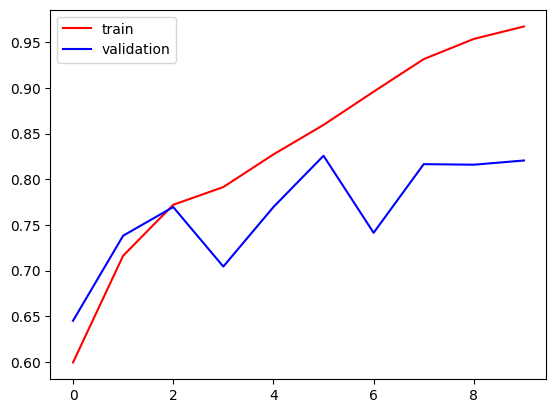

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],color = 'red',label = 'train')
plt.plot(hist.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

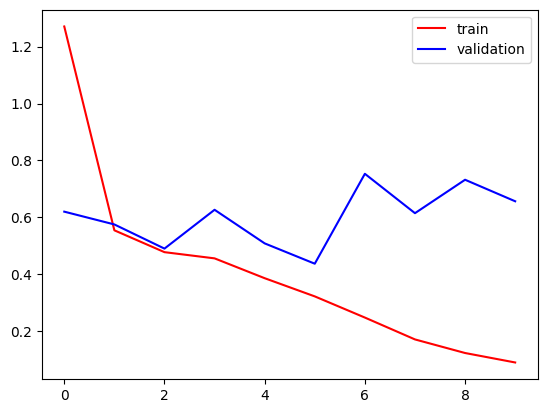

In [8]:
plt.plot(hist.history['loss'],color = 'red',label = 'train')
plt.plot(hist.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [9]:
import cv2

In [10]:
test_img = cv2.imread("/kaggle/input/prediction-data/Screenshot 2024-09-28 232135.png")

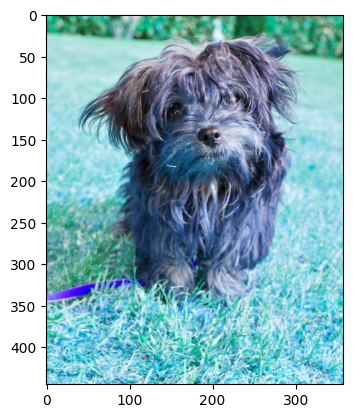

In [11]:
plt.imshow(test_img)

In [12]:
test_img.shape

(445, 358, 3)

In [13]:
test_img = cv2.resize(test_img,(256,256))

In [14]:
test_inp = test_img.reshape((1,256,256,3))

In [15]:
model.predict(test_inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


array([[1.]], dtype=float32)

1 means Dog 👆